Enter a: 2
Enter b: 9
Enter c: 4


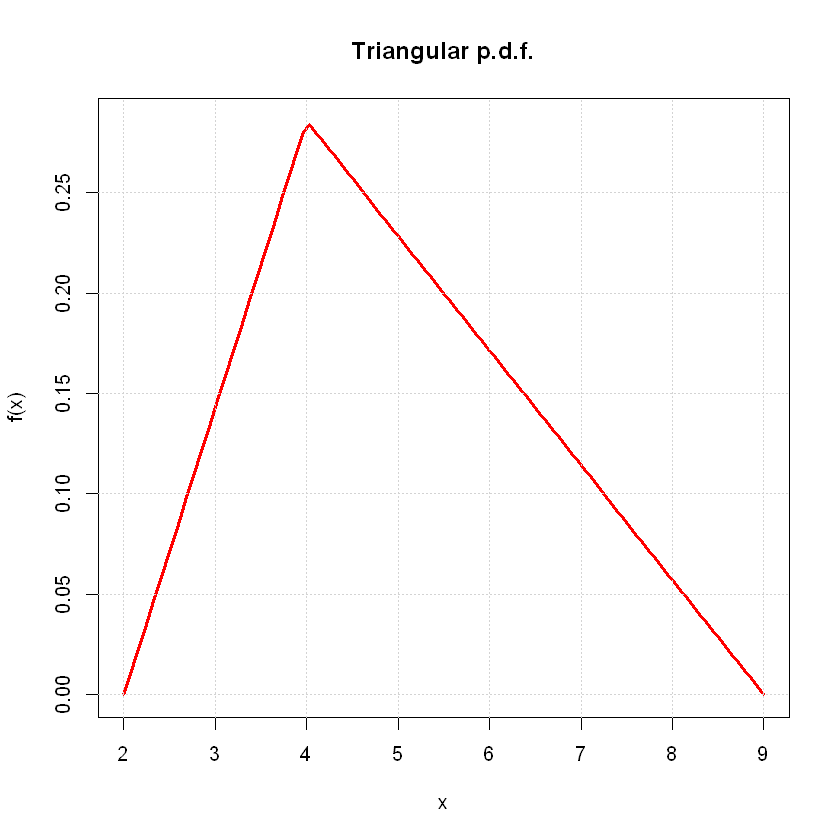

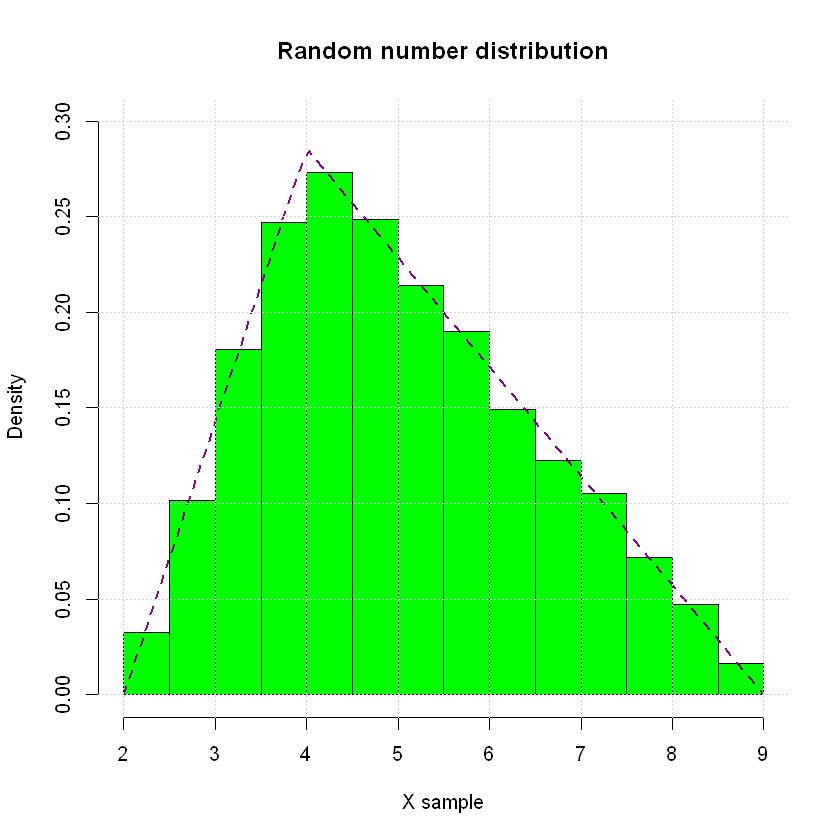

In [4]:
library(tidyverse)
a<-readline(prompt="Enter a: ")%>%as.numeric()
b<-readline(prompt="Enter b: ")%>%as.numeric()
while(b<=a){
    b<-readline(prompt="Enter b: ")%>%as.numeric()
}
c<-readline(prompt="Enter c: ")%>%as.numeric()
while(c<a|c>b){
    c<-readline(prompt="Enter c: ")%>%as.numeric()
}

Tri<-function(x) {ifelse(x>=a&x<c, (2*(x-a))/((b-a)*(c-a)), ifelse(x>=c&x<=b, (2*(b-x))/((b-a)*(b-c)), 0))}
plot(Tri, col="red", main="Triangular p.d.f.", ylab="f(x)", xlim=c(a, b), ylim=range(c(0, Tri(c))), lwd=3)
grid()


#TriCum<-function(x) {ifelse(x>=a&x<c, ((x-a)^2)/((b-a)*(c-a)), ifelse(x>=c&x<=b, 1-((b-x)^2)/((b-a)*(b-c)),                                                                    ifelse(x>b, 1 , 0)))}
#plot(TriCum, xlim=c(a, b))
#grid()


Sample<-function(n){
    U<-runif(n)
    rTri<-ifelse(U<(c-a)/(b-a), a+sqrt((b-a)*(c-a)*U), b-sqrt((b-a)*(b-c)*(1-U)))
    return(rTri)
}

Xset<-Sample(1:10^4)
hist(Xset, main="Random number distribution", xlab="X sample", xlim=c(a, b), ylim=range(pretty(c(0, Tri(c)))), col="green", freq=FALSE)
curve(Tri, col="darkmagenta", add=TRUE, lwd=2, lty=2)
grid()

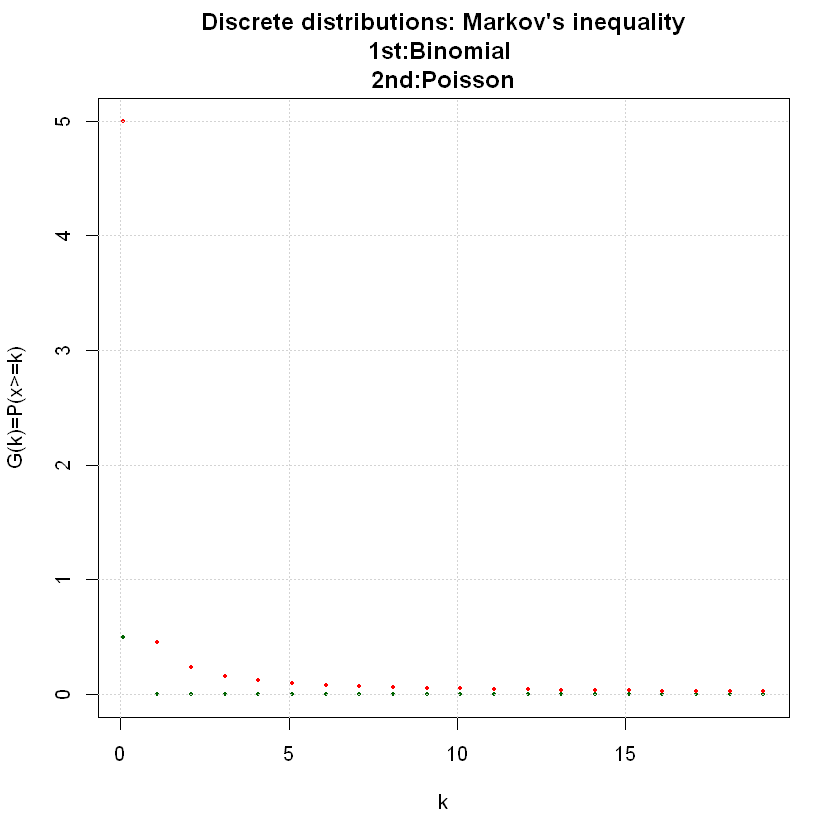

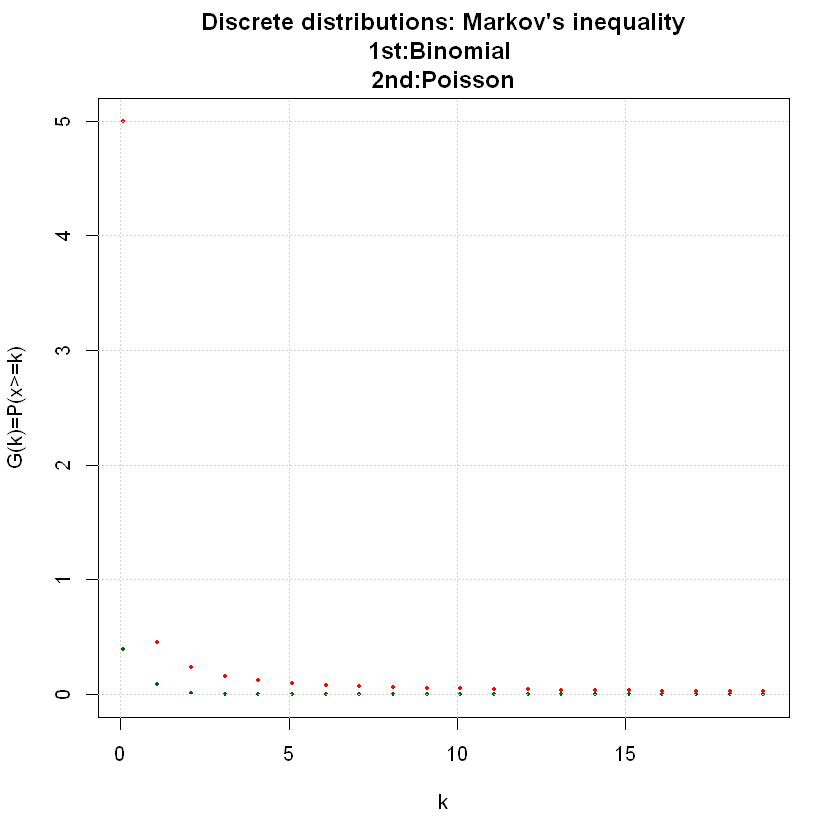

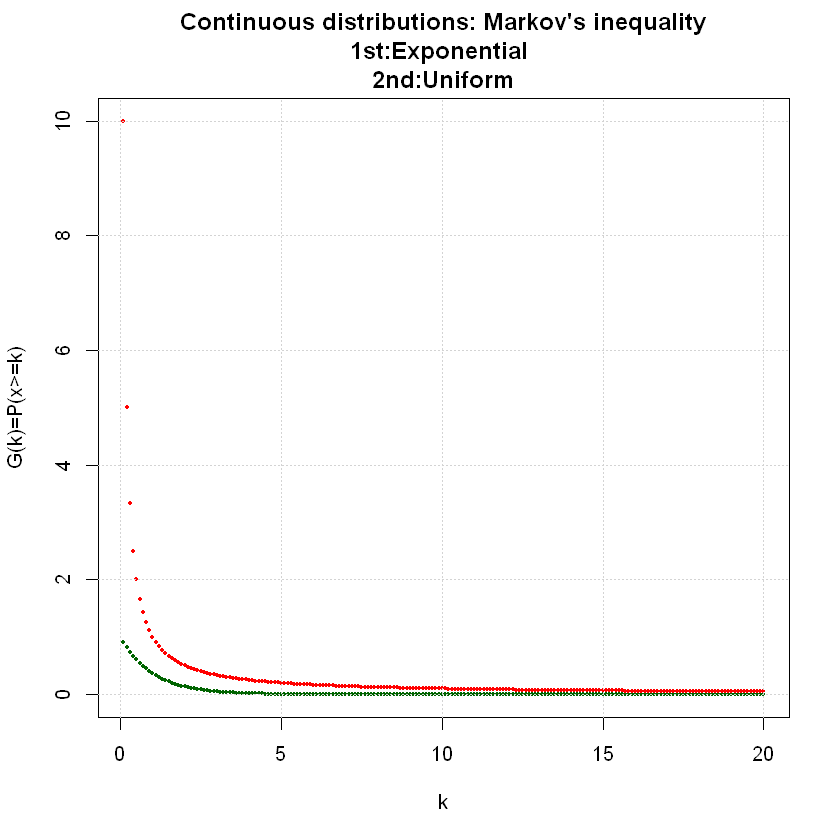

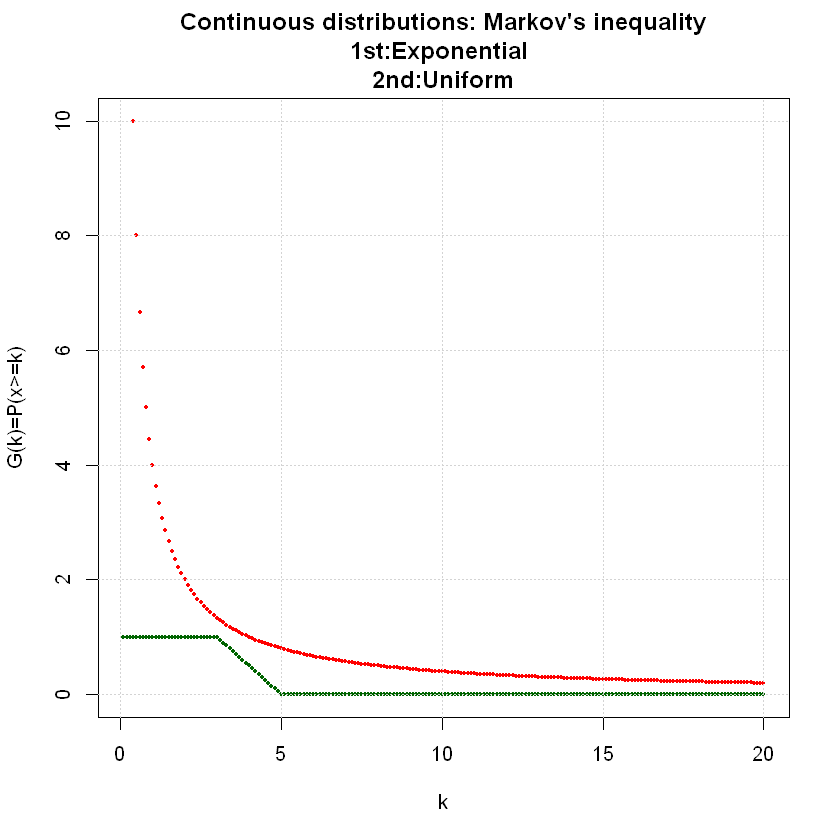

In [2]:
kl<-list("k1"=seq(0.1, 20, 1), "k2"=seq(0.1, 20, 0.1))
Gl<-list("binom"=1-pbinom(kl$k1, 1, 1/2), "pois"=1-ppois(kl$k1, lambda=1/2), "exp"=1-pexp(kl$k2, rate=1), "unif"=1-punif(kl$k2, 3, 5))
meanl<-list("mbinom"=1/2, "mpois"=1/2, "mexp"=1, "munif"=4)

Pdiscr<-function(m, P){
    plot(x=kl$k1, y=P, cex=0.4, pch=19,  col="darkgreen", xlab="k", ylab="G(k)=P(x>=k)", main = "Discrete distributions: Markov's inequality\n1st:Binomial \n2nd:Poisson", ylim=range(0, 5))
    points(x=kl$k1, y=m/kl$k1, cex=0.4, pch=19,  col="red")
    grid()
}

Pcont<-function(m, P){
    plot(x=kl$k2, y=P, cex=0.4, pch=19,  col="darkgreen", xlab="k", ylab="G(k)=P(x>=k)", main = "Continuous distributions: Markov's inequality\n1st:Exponential \n2nd:Uniform", ylim=range(0, 10))
    points(x=kl$k2, y=m/kl$k2, cex=0.4, pch=19,  col="red")
    grid()
}

for(i in 1:4){if(i==1|i==2){Pdiscr(meanl[[i]], Gl[[i]])}else{Pcont(meanl[[i]], Gl[[i]])}}




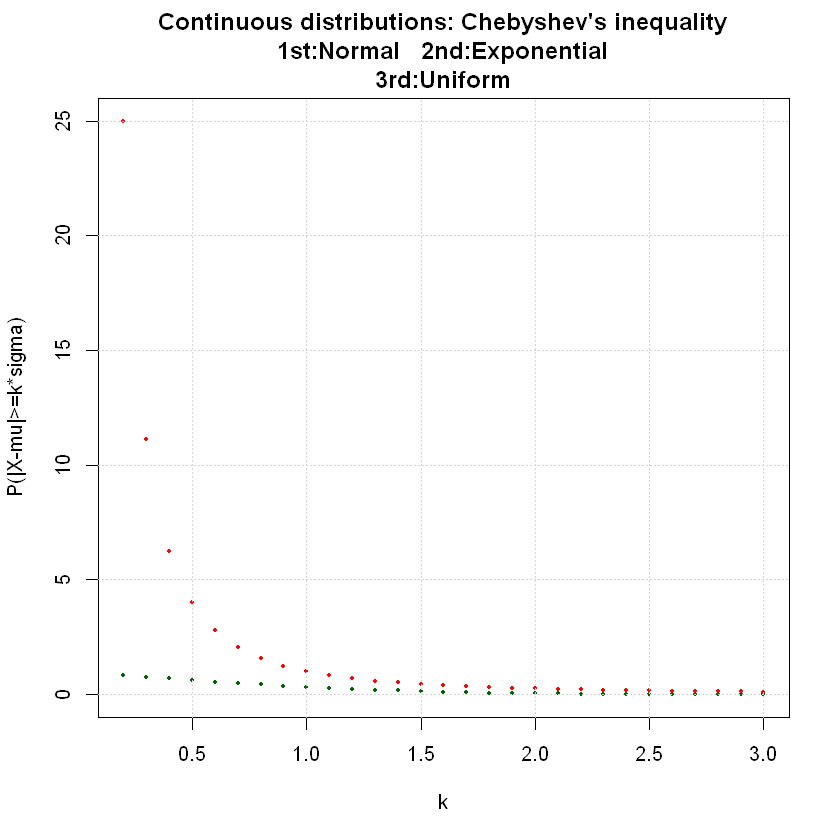

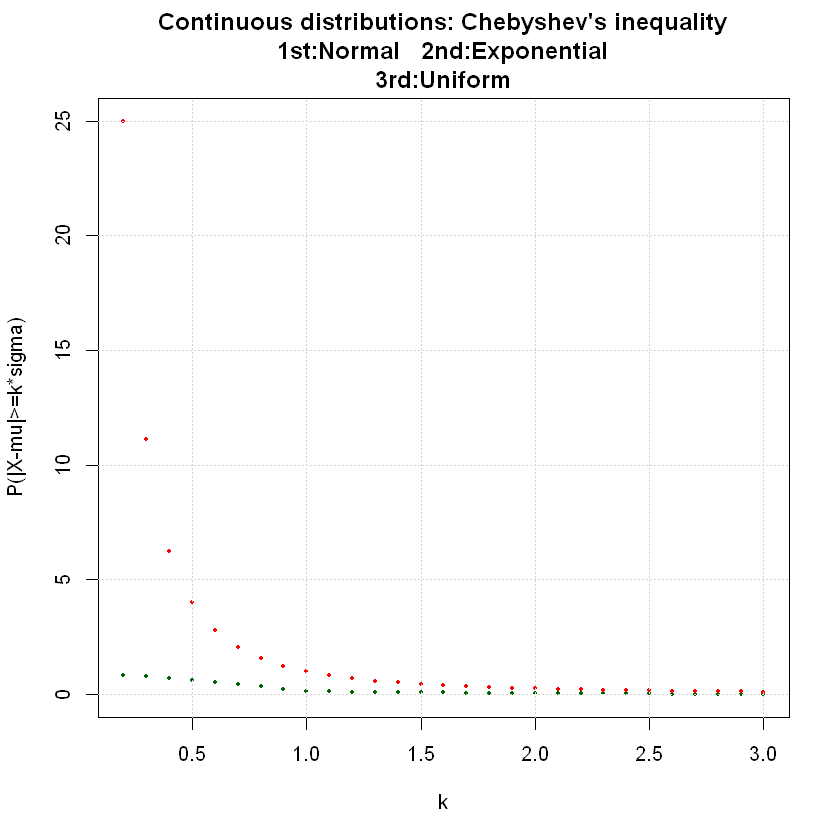

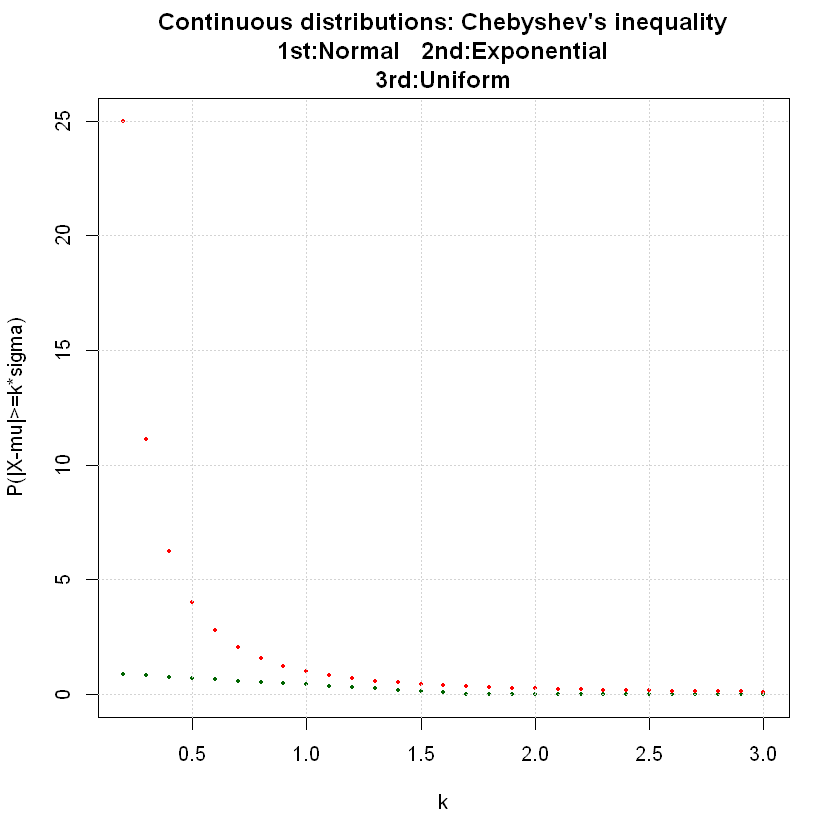

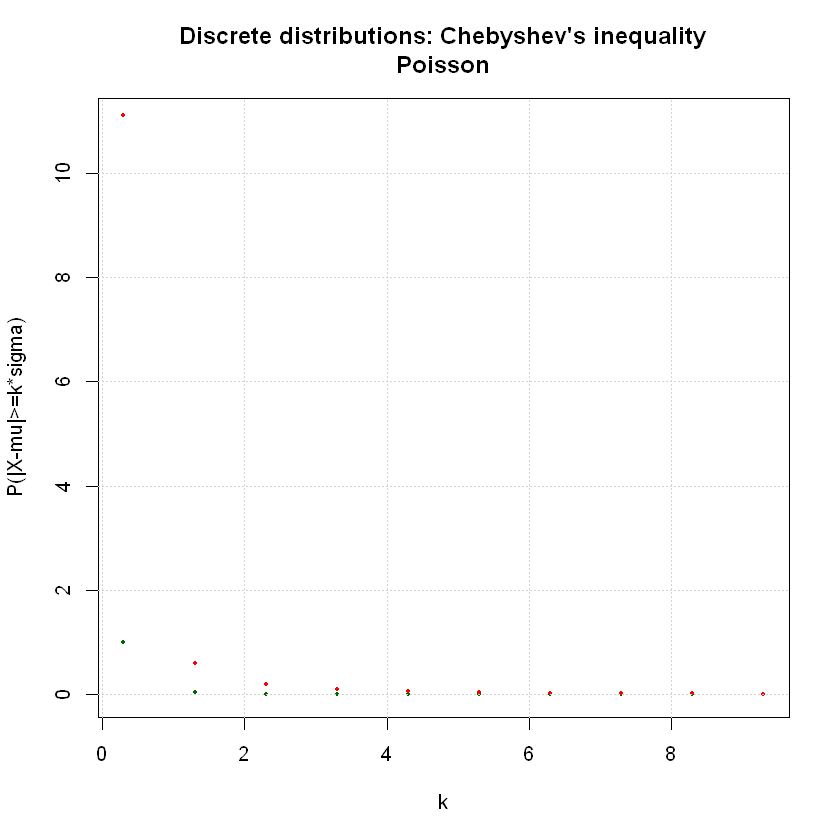

In [5]:
kl<-list("k1"=seq(0.2, 3, 0.1), "k2"=seq(0.3, 10, 1))
meanl<-list("norm"=3, "exp"=1, "unif"=1, "pois"=1/3)
sdl<-list("norm"=5, "exp"=1, "unif"=sqrt(2/3), "pois"=sqrt(1/3))
Cl<-list("norm"=1-pnorm(meanl$norm+sdl$norm*kl$k1, mean=meanl$norm, sd=sdl$norm)+pnorm(meanl$norm-sdl$norm*kl$k1, mean=meanl$norm, sd=sdl$norm), 
         "exp"=1-pexp(meanl$exp+sdl$exp*kl$k1, 1)+pexp(meanl$exp-sdl$exp*kl$k1, 1), 
         "unif"=1-punif(meanl$unif+sdl$unif*kl$k1, 1-sqrt(2), 1+sqrt(2))+punif(meanl$unif-sdl$unif*kl$k1, 1-sqrt(2), 1+sqrt(2)), 
         "pois"=1-ppois(meanl$pois+sdl$unif*kl$k2, 1/3)+ppois(meanl$pois-sdl$unif*kl$k2, 1/3))

Pdiscr<-function(P){
    plot(x=kl$k1, y=P, cex=0.4, pch=19,  col="darkgreen", xlab="k", ylab="P(|X-mu|>=k*sigma)", main = "Continuous distributions: Chebyshev's inequality\n1st:Normal   2nd:Exponential\n3rd:Uniform", ylim=range(0, 25))
    points(x=kl$k1, y=1/(kl$k1)^2, cex=0.4, pch=19,  col="red")
    grid()
}
for(i in 1:3){Pdiscr(Cl[[i]])}


plot(x=kl$k2, y=Cl$pois, cex=0.4, pch=19,  col="darkgreen", xlab="k", ylab="P(|X-mu|>=k*sigma)", main = "Discrete distributions: Chebyshev's inequality\nPoisson", ylim=range(0, 11))
points(x=kl$k2, y=1/(kl$k2)^2, cex=0.4, pch=19,  col="red")
grid()



